In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import mode
from sklearn.svm import SVC
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
# Suppress scikit-learn warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Reading dataset

In [3]:
data = pd.read_csv(r'V:\The AI health Bot\dataset\training_data.csv')


In [4]:
data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Bloating,difficulty_eating,urgent_urination,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [5]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Bloating,difficulty_eating,urgent_urination,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Ovarian cancer
4926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Ovarian cancer
4927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Ovarian cancer
4928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Ovarian cancer


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4930.0,0.137525,0.344436,0.0,0.0,0.0,0.0,1.0
skin_rash,4930.0,0.159432,0.366116,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4930.0,0.021907,0.146394,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4930.0,0.045030,0.207392,0.0,0.0,0.0,0.0,1.0
shivering,4930.0,0.021907,0.146394,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
red_sore_around_nose,4930.0,0.023124,0.150312,0.0,0.0,0.0,0.0,1.0
yellow_crust_ooze,4930.0,0.023124,0.150312,0.0,0.0,0.0,0.0,1.0
Bloating,4930.0,0.002028,0.044997,0.0,0.0,0.0,0.0,1.0
difficulty_eating,4930.0,0.002028,0.044997,0.0,0.0,0.0,0.0,1.0


In [7]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
yellow_crust_ooze       0
Bloating                0
difficulty_eating       0
urgent_urination        0
prognosis               0
Length: 136, dtype: int64

In [8]:
data.dropna(axis=1,inplace=True)

In [9]:
data_input = data.drop(columns=['prognosis'])
data_output = data['prognosis']

In [10]:
data['prognosis'].value_counts()

prognosis
Fungal infection                           120
Hypothyroidism                             120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hyperthyroidism                            120
Allergy                                    120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Impetigo                                   120
Hepatitis D                                120
Hep

# Splitting dataset into training, validation, and test sets

In [11]:


from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, test_size=0.30, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

print('X_train.shape =', X_train.shape)
print('y_train.shape =', y_train.shape)
print('-------------------------------')
print('X_val =', X_val.shape)
print('y_val.shape =', y_val.shape)
print('-------------------------------')
print('X_test =', X_test.shape)
print('y_test.shape =', y_test.shape)

X_train.shape = (2415, 135)
y_train.shape = (2415,)
-------------------------------
X_val = (1036, 135)
y_val.shape = (1036,)
-------------------------------
X_test = (1479, 135)
y_test.shape = (1479,)


In [12]:
# value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# KNN Training and Validation

In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_val = accuracy_score(y_val, y_pred_val)

print('accuracy_train =', accuracy_train)
print('accuracy_val =', accuracy_val)

accuracy_train = 0.998343685300207
accuracy_val = 0.997104247104247


# Final Test

In [15]:
best_model = KNeighborsClassifier(n_neighbors=10, weights='uniform')
best_model.fit(X_train, y_train)
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.9979716024340771


## DecisionTree

#  Training and validation (model selection)
We train the model using X_train and validate it using X_val. For example let's create a decision tree with max_depth=3.

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
model = DecisionTreeClassifier(max_depth=3, random_state=2)

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

In [21]:
print('Training accuracy =', accuracy_score(y_train, y_pred_train))
print('Validation accuracy =', accuracy_score(y_val, y_pred_val))

Training accuracy = 0.11014492753623188
Validation accuracy = 0.08011583011583012


## Try changing the model hyper-parameters (such as max_depth) and keep repeating the training and validation process until you achieve a good validation accuracy value

In [22]:
# we are going to try these values
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8]

# we store the accuracy values of our experiments in two lists 
# (for training and validation)
training_accuracy_values = []
validation_accuracy_values = []

# we loop over the max_depth_values
for max_depth_val in max_depth_values:
    
    # create the model
    model = DecisionTreeClassifier(max_depth=max_depth_val, 
                                   random_state=2)
    
    # train the model
    model.fit(X_train, y_train)
    
    # calculate the training and validation accuracy
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    
    # add these results to the lists
    training_accuracy_values.append(acc_train)
    validation_accuracy_values.append(acc_val)

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

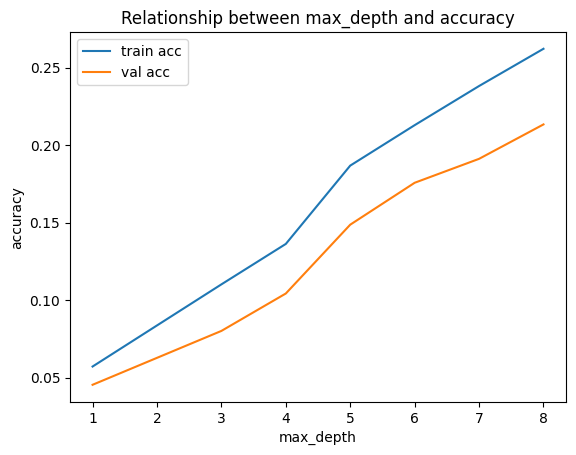

In [24]:
plt.plot(max_depth_values, training_accuracy_values, label="train acc")
plt.plot(max_depth_values, validation_accuracy_values, label="val acc")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('Relationship between max_depth and accuracy')
plt.legend()
plt.show()

The previous plot shows that the best result is achieved when max_depth=3. As the max_depth increases, the validation accuracy becomes low compared to training accuracy. This is known as "overfitting".

So the best model has max_depth=3:

In [27]:
model_best = DecisionTreeClassifier(max_depth=45, random_state=2)
model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=45, random_state=2)

#  Testing
After we select the final model, we test it using the un-seen test data. 

**Warning:** After we test the model, we are not allowed to modify it and test it again using the same data!

In [28]:
y_pred_test = model_best.predict(X_test)

In [29]:
print('Test accuracy:', accuracy_score(y_test, y_pred_test))

Test accuracy: 0.9783637592968222


In [30]:
import joblib
joblib.dump(model_best,"try2.joblib")

['try2.joblib']